## Regresión y clasificación para calidad de vinos

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [5]:
#import the data set
df = pd.read_csv('./ConjuntosDeDatos/VinhoVerde.csv', sep=',')

In [74]:
# print the first 5 rows of the data set
df.head()

#print size of the data set
#print(df.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Study the dataset in itself

[0.94657698 0.0483683 ]
Total explained variance:  0.9949452809702793


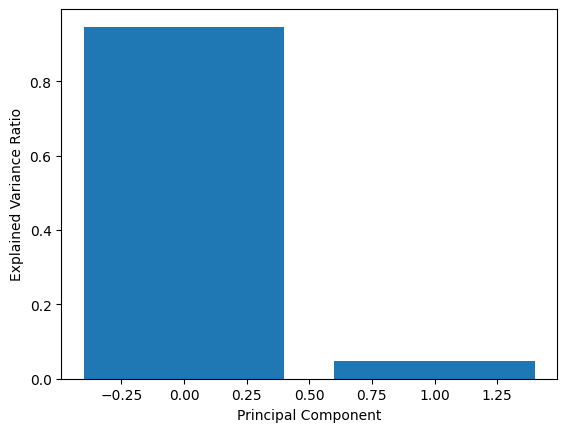

Component 1:
0.006*fixed acidity + 0.0*volatile acidity + 0.0*citric acid + 0.009*residual sugar + 0.0*chlorides + 0.219*free sulfur dioxide + 0.976*total sulfur dioxide + 0.0*density + 0.0*pH + 0.0*sulphates + 0.006*alcohol

Component 2:
0.024*fixed acidity + 0.002*volatile acidity + 0.003*citric acid + 0.011*residual sugar + 0.0*chlorides + 0.975*free sulfur dioxide + 0.219*total sulfur dioxide + 0.0*density + 0.003*pH + 0.001*sulphates + 0.015*alcohol



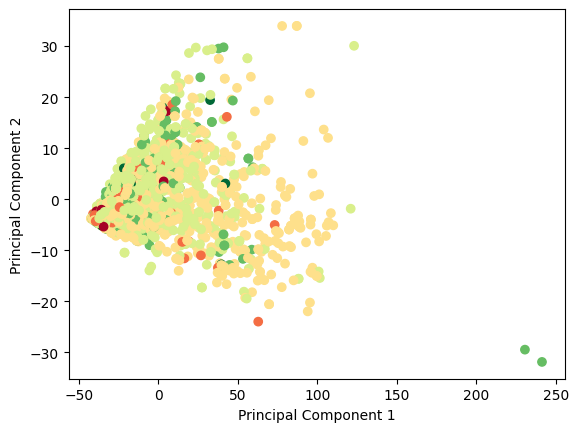

In [85]:
# make a PCA and determine the number of components to keep
from sklearn.decomposition import PCA

# define the number of components to keep
n_components = 2

# create the PCA object
pca = PCA(n_components=n_components)

# fit the PCA object to the data
pca.fit(df.drop('quality', axis=1))

# print the explained variance ratio
print(pca.explained_variance_ratio_)
print('Total explained variance: ', sum(pca.explained_variance_ratio_))

# plot the explained variance ratio
fig, ax = plt.subplots()
ax.bar(range(n_components), pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
plt.show()

# print which features are most important for each component
for i, component in enumerate(pca.components_):
    print('Component {}:'.format(i+1))
    print(' + '.join(['{}*{}'.format(round(abs(value), 3), columns[idx]) for idx, value in enumerate(component)]))
    print()

# transform the data
pca_data = pca.transform(df.drop('quality', axis=1))

# plot the transformed data
fig, ax = plt.subplots()
ax.scatter(pca_data[:, 0], pca_data[:, 1], c=df['quality'], cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=3, vmax=8))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

El análisis PCA nos dice qué componentes son las que más varían en el dataset.
En particular para este caso, parece que las variables que más variaron en el dataset son total sulfur dioxide y free sulfur dioxide

### Study quality for one variable

Plot a histogram plot to study the alcohol level (or any other variable) of the worst and best wines

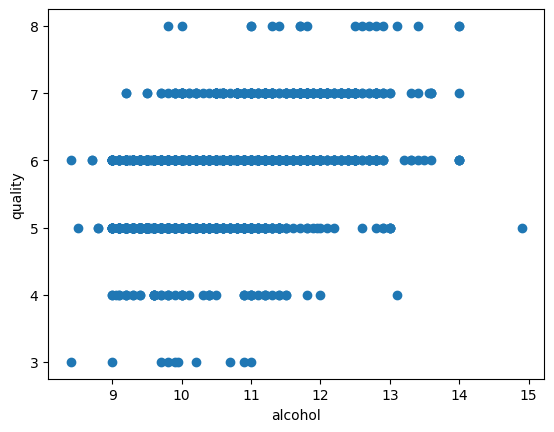

In [80]:
feat_name = 'alcohol'

#plot the column vs quality
plt.scatter(df[feat_name], df['quality'])
plt.xlabel(feat_name)
plt.ylabel('quality')
plt.show()


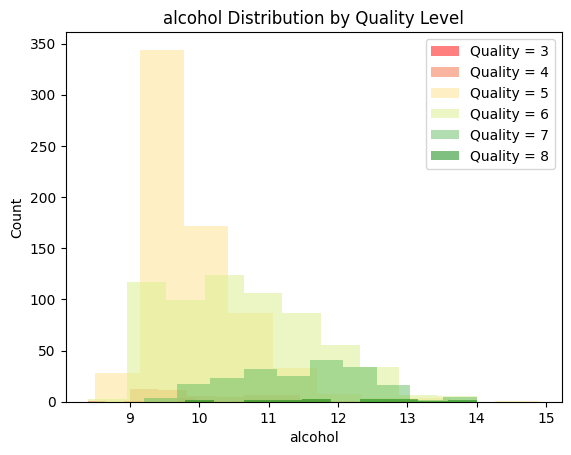

In [81]:
# Define the number of bins for the histogram
num_bins = 10

# Define the colors for the different quality levels
low_quality_color = 'red'
high_quality_color = 'green'

# Define a colormap to interpolate the colors for the intermediate quality levels
cmap = plt.cm.get_cmap('RdYlGn')
norm = plt.Normalize(vmin=3, vmax=8)

# Iterate over the quality levels and plot a separate histogram for each level
for quality in range(3, 9):
    color = cmap(norm(quality))
    if quality == 3:
        color = low_quality_color
    elif quality == 8:
        color = high_quality_color
    plt.hist(df[df['quality']==quality][feat_name], bins=num_bins, 
             color=color, alpha=0.5, label=f'Quality = {quality}')

# Add labels and title to the plot
plt.xlabel(feat_name)
plt.ylabel('Count')
plt.title(feat_name+ ' Distribution by Quality Level')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

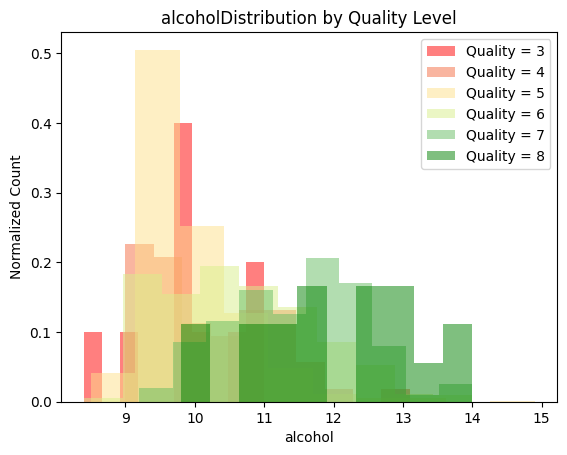

In [82]:
#same but normalized

# Define the number of bins for the histogram
num_bins = 10

# Define the colors for the different quality levels
low_quality_color = 'red'
high_quality_color = 'green'

# Define a colormap to interpolate the colors for the intermediate quality levels
cmap = plt.cm.get_cmap('RdYlGn')
norm = plt.Normalize(vmin=3, vmax=8)

# Create a list to store the total number of wines for each quality level
total_wines = []

# Iterate over the quality levels and plot a separate histogram for each level
for quality in range(3, 9):
    color = cmap(norm(quality))
    if quality == 3:
        color = low_quality_color
    elif quality == 8:
        color = high_quality_color
    # Get the alcohol levels for the wines with the current quality level
    alcohol_levels = df[df['quality']==quality][feat_name]
    # Calculate the total number of wines for the current quality level
    total_wines.append(len(alcohol_levels))
    # Plot a histogram of alcohol levels normalized to the number of wines for the current quality level
    plt.hist(alcohol_levels, bins=num_bins, color=color, alpha=0.5, 
             weights=np.ones_like(alcohol_levels)/len(alcohol_levels), 
             label=f'Quality = {quality}')

# Add labels and title to the plot
plt.xlabel(feat_name)
plt.ylabel('Normalized Count')
plt.title(feat_name+'Distribution by Quality Level')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


### 2d scatter to see relation between two variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

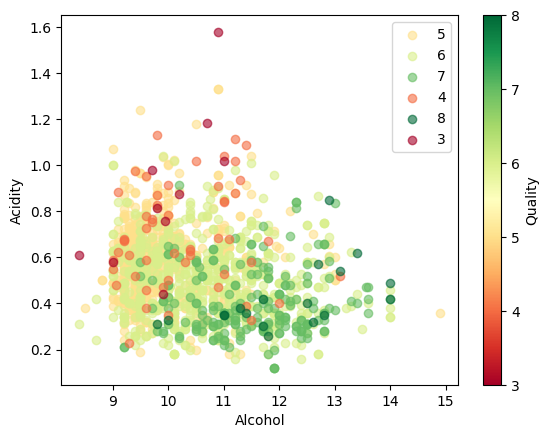

In [60]:
# Create the scatter plot
fig, ax = plt.subplots()
for quality in df['quality'].unique():
    data = df[df['quality'] == quality]
    ax.scatter(data['alcohol'], data['volatile acidity'], c=plt.cm.RdYlGn(norm(quality)), label=quality, alpha=0.6)

# Add legend and labels
ax.legend()
ax.set_xlabel('Alcohol')
ax.set_ylabel('Acidity')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Quality')

plt.show()

### Exploratory 3d plot to see if some correlation

selected features:  alcohol density residual sugar


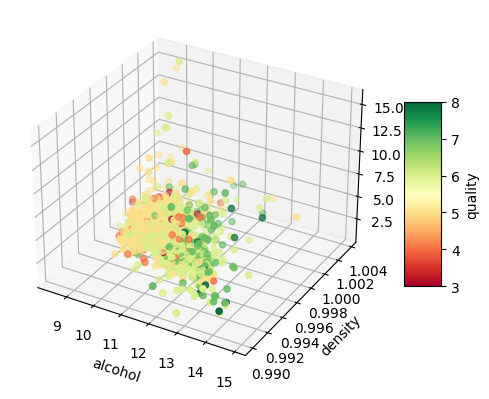

In [31]:
# define list with the names of the columns
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# random idx for the columns
indices = np.random.choice(len(columns)-1, size=3, replace=False)

print("selected features: ", columns[indices[0]], columns[indices[1]], columns[indices[2]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.cm.get_cmap('RdYlGn') # colormap ranging from red to green
normalize = plt.Normalize(vmin=df['quality'].min(), vmax=df['quality'].max()) # normalize quality values

# plot the data
scatter = ax.scatter(df[columns[indices[0]]], df[columns[indices[1]]], df[columns[indices[2]]], 
                      c=df['quality'], cmap=cmap, norm=normalize)
ax.set_xlabel(columns[indices[0]])
ax.set_ylabel(columns[indices[1]])
ax.set_zlabel(columns[indices[2]])

# add a colorbar legend
cbar = plt.colorbar(scatter, shrink=0.5, aspect=5)
cbar.set_label('quality')

plt.show()

### Correlation calculation of the features and quality

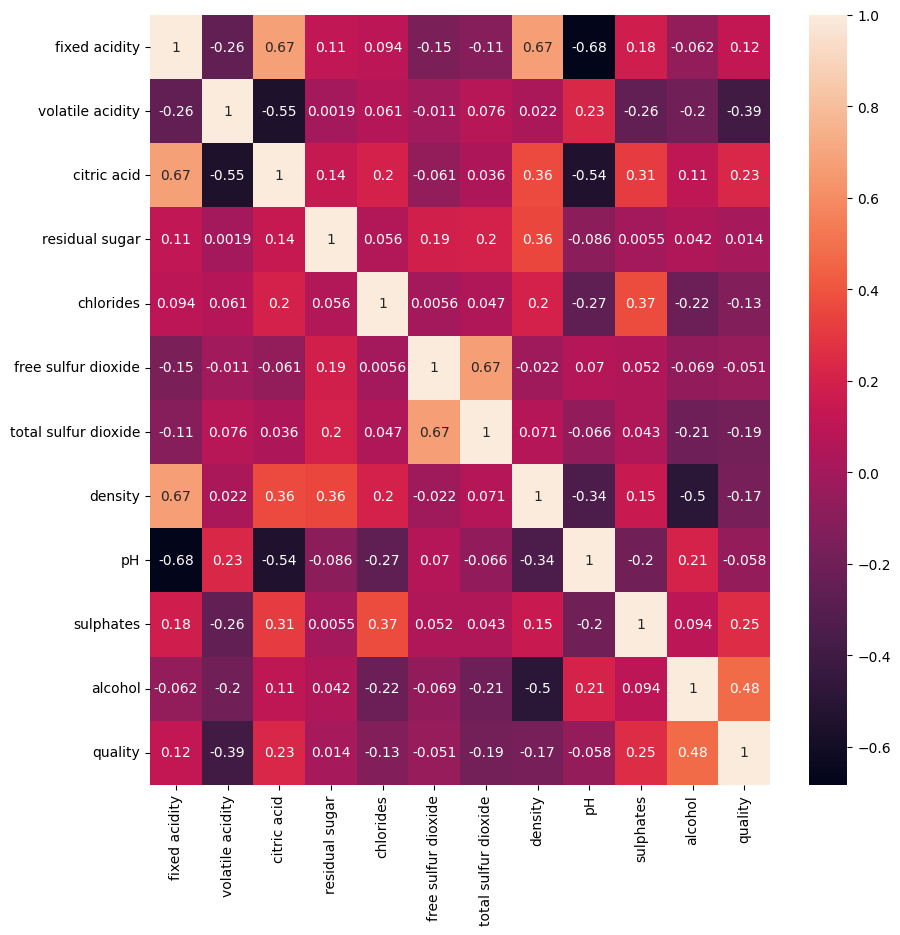

In [61]:
# study correlation of the features with the quality
corr = df.corr()
corr['quality'].sort_values(ascending=False)

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()


In [84]:
# order them by the last column's absolute value and print
print(corr['quality'].abs().sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


El valor absoluto de la última columna determina la correlación entre las distintas features y la calidad.
Las variables que más correlacionan con la calidad son alcohol, volatile acidity, sulphates, citric acid.

### Regression Models

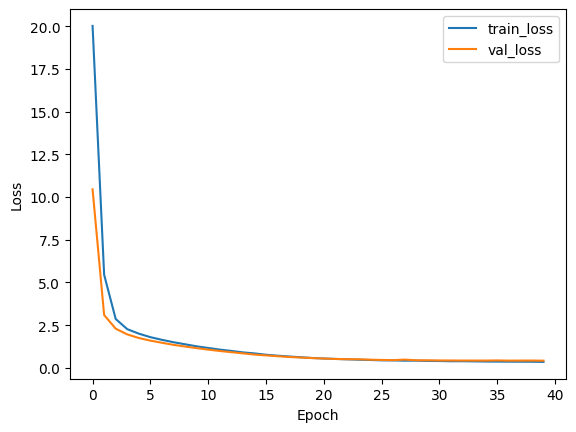

15/15 [==============================] - 0s 2ms/step


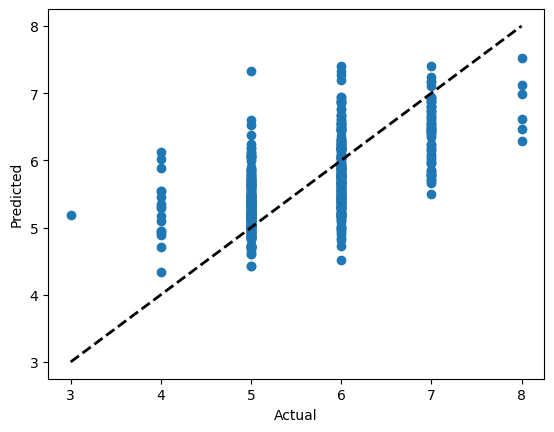

35/35 [==============================] - 0s 2ms/step
RMSE for training set:  0.5835475814418621
15/15 [==============================] - 0s 2ms/step
RMSE for test set:  0.6518076362598276


In [105]:
# split the data into training and test sets (70% training, 30% test)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#import sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


train, test = train_test_split(df, test_size=0.3, random_state=42)

# define the features and the target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = 'quality'

# create the training and test sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# create the scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create the model and train it using the scaled data
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

history = model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))

# plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# plot the predicted vs actual values for the test set
y_pred = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# print RMSE for training and test sets
print('RMSE for training set: ', np.sqrt(mean_squared_error(y_train, model.predict(X_train_scaled))))
print('RMSE for test set: ', np.sqrt(mean_squared_error(y_test, model.predict(X_test_scaled))))


Train RMSE: 0.48
Test RMSE: 0.62


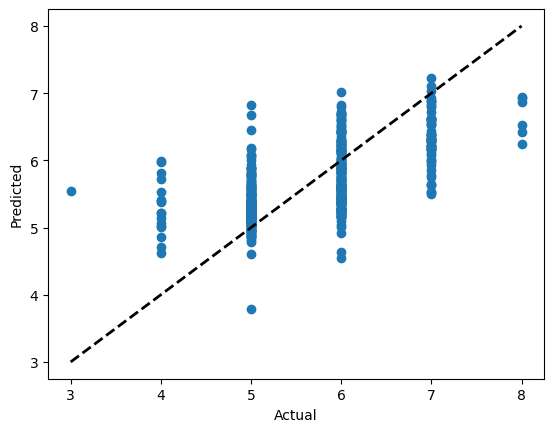

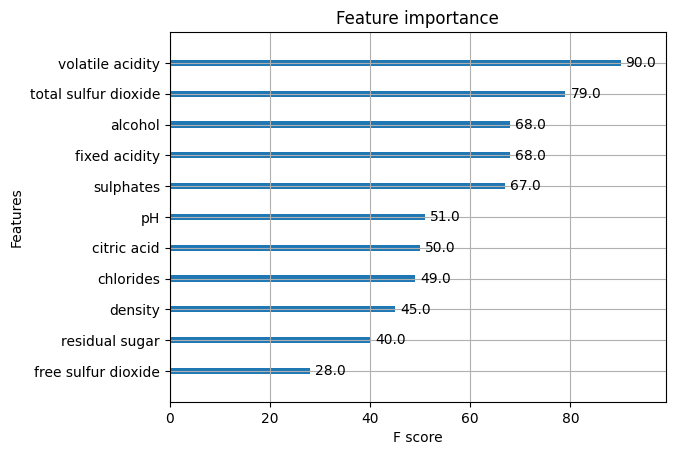

In [106]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# create the training and test sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# create the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# train the model
xgb_model.fit(X_train, y_train)

# predict the test set
y_pred = xgb_model.predict(X_test)

# compute train RMSE and test RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# plot the predicted vs actual values for the test set
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# sanity check: plot the feature importances
xgb.plot_importance(xgb_model)
plt.show()


### Now with classification

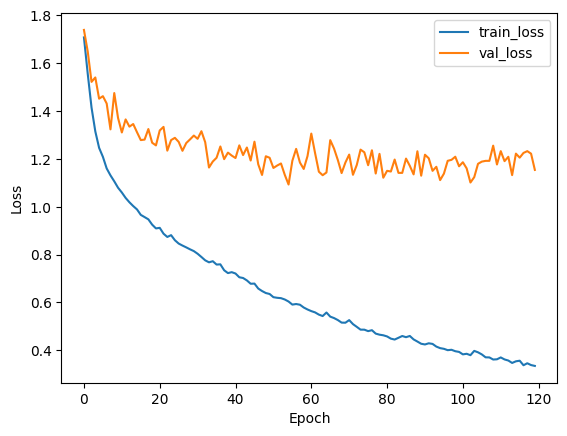

15/15 [==============================] - 0s 2ms/step


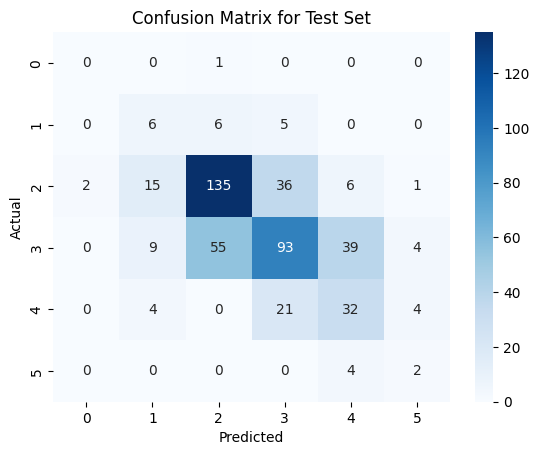

35/35 [==============================] - 0s 4ms/step


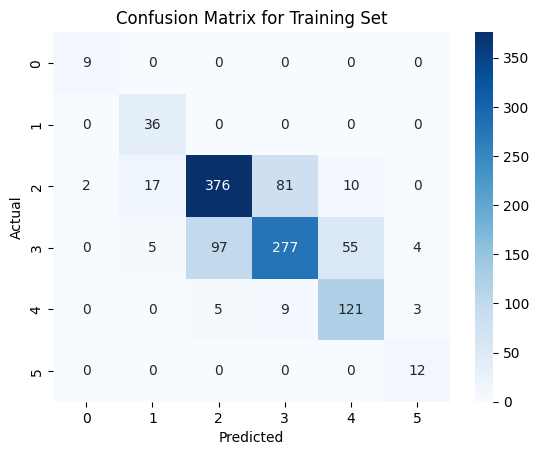

35/35 [==============================] - 0s 3ms/step - loss: 0.5828 - accuracy: 0.7426
Accuracy for training set:  0.7426273226737976
15/15 [==============================] - 0s 2ms/step - loss: 1.1539 - accuracy: 0.5583
Accuracy for test set:  0.5583333373069763


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# split the data into training and test sets (70% training, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

# define the features and the target
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
target = 'quality'

# create the training and test sets
X_train = train[features]
y_train = to_categorical(train[target] - 3)  # convert integer labels to categorical labels
X_test = test[features]
y_test = to_categorical(test[target] - 3)

# compute class weights to compensate for class imbalance
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train[target]), y=train[target])
class_weights = dict(enumerate(class_weights))

# create the scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create the model and train it using the scaled data
model = Sequential()
model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # output layer has 6 neurons for 6 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=120, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test), class_weight=class_weights)

# plot the training and validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# plot the predicted vs actual values for the test set
y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1) + 3  # convert one-hot encoded labels back to integers
y_test_labels = np.argmax(y_test, axis=1) + 3

# get the confusion matrix for the training set
cm = confusion_matrix(np.argmax(y_train, axis=1) + 3, np.argmax(model.predict(X_train_scaled), axis=1) + 3)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set')
plt.show()

# get the confusion matrix for the test set
cm = confusion_matrix(y_test_labels, y_pred_labels)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()


# print accuracy for training and test sets
print('Accuracy for training set: ', model.evaluate(X_train_scaled, y_train)[1])
print('Accuracy for test set: ', model.evaluate(X_test_scaled, y_test)[1])


#### XGBoost GridSearch

In [149]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np

# split the data into training and test sets (70% training, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

# define the features and the target
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
target = 'quality'

# create the training and test sets
X_train = train[features]
y_train = train[target] - 3  # convert integer labels to categorical labels
X_test = test[features]
y_test = test[target] - 3

# compute class weights to compensate for class imbalance
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train[target]-3), y=train[target]-3)
class_weights = dict(enumerate(class_weights))

# create the XGBoost model and define the parameter grid to search
model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, scale_pos_weight=class_weights)
param_grid = {
    'max_depth': [3, 4, 5],
    #'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'gamma': [0, 0.25, 1.0],
}

# define the scoring metric for the search
scoring = make_scorer(accuracy_score)

# perform Halving Grid Search using XGBoost
search = HalvingGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    factor=2,
    max_resources=200,
    resource='n_estimators',
    cv=5,
    random_state=42
)

search.fit(X_train, y_train)

# print the best hyperparameters found and their corresponding accuracy score
print('Best hyperparameters: ', search.best_params_)
print('Accuracy score on training set: ', search.best_score_)

# make predictions on the test set using the best model
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# calculate accuracy on the test set using the best model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set: ', accuracy)

# calculate f1, precision, and recall on the test set using the best model
print('F1 score: ', f1_score(y_test, y_pred, average='weighted'))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

# get the confusion matrix for the training set using the best model
cm = confusion_matrix(y_train,X_train)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set')
plt.show()

# get the confusion matrix for the test set using the best model
cm = confusion_matrix(y_test, y_pred)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

# plot the feature importances of the best model
xgb.plot_importance(best_model)
plt.show()


[19:12:03] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:06] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:09] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:11] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:13] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:13] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:13] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:13] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:14] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:14] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[19:12:14] WARNING: ../src/learner.cc:767: 
Parameters: { "s

KeyboardInterrupt: 

#### SVM Classifier

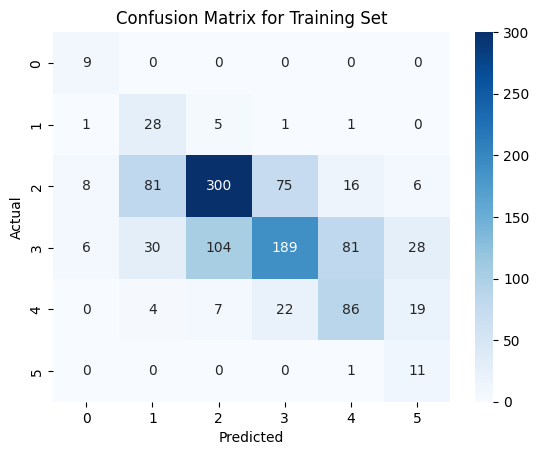

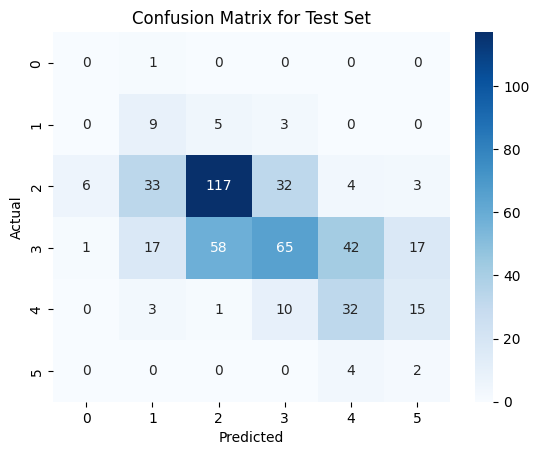

Accuracy for test set:  0.46875
Accuracy for training set:  0.5567470956210903


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# split the data into training and test sets (70% training, 30% test)
train, test = train_test_split(df, test_size=0.3, random_state=42)

# define the features and the target
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
target = 'quality'

# create the training and test sets
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# compute class weights to compensate for class imbalance
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(train[target]), y=train[target])

# create the scaler
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create the model and train it using the scaled data
model = SVC(kernel='rbf', class_weight='balanced')

model.fit(X_train_scaled, y_train)

# get the predicted labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate accuracy and confusion matrix for the training set
y_pred_train = model.predict(X_train_scaled)
accuracy_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Set')
plt.show()

# calculate accuracy and confusion matrix for the test set
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

# print accuracy for test set
print('Accuracy for test set: ', accuracy)
print('Accuracy for training set: ', accuracy_train)
